1_ normalizar valores de columas
2_ identificar nulos, faltantes y duplicados (contarlos y corregirlos)
3_ extraer las columnas que serán usadas y crear los datasets finales (hacer un excel con las diferencias por sector por trimestre, otro con las diferencias por ciudad)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [226]:
df_Int_sheets = pd.ExcelFile('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx').sheet_names
df_Int_sheets

['Acc_vel_loc_sinrangos',
 'Velocidad_sin_Rangos',
 'Accesos_tecnologia_localidad',
 'Velocidad % por prov',
 'Totales VMD',
 'Totales Accesos Por Tecnología',
 'Accesos Por Tecnología',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Penetracion-totales',
 'Totales Accesos por rango',
 'Accesos por rangos',
 'Dial-BAf',
 'Totales Dial-BAf',
 'Ingresos ']

In [227]:
df_int_accptech = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Accesos Por Tecnología')
print(f'{df_int_accptech.head(2)}')

    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  


In [228]:
print(f'Dtype & Shape: \n{df_int_accptech.dtypes}{df_int_accptech.shape}\n')

Dtype & Shape: 
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object(1009, 9)



In [229]:
print(f'Duplicados:     {df_int_accptech.duplicated().sum()}\nNulos: \n{df_int_accptech.isnull().sum()}\n')

Duplicados:     0
Nulos: 
Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64



In [230]:
df_int_accptech.dropna(inplace=True)
print(df_int_accptech['Año'].unique())
print(df_int_accptech['Trimestre'].unique())


[2024 2023 2022 2021 2020 2019 '2019 *' 2018 2017 2016 2015 2014]
[2 1 4 3 '3 *' '2 *' '1 *']


In [231]:
df_int_accptech['Año'] = df_int_accptech['Año'].astype(str).str.replace(' *', '').astype(int)
df_int_accptech['Trimestre'] = df_int_accptech['Trimestre'].astype(str).str.replace(' *', '').astype(int) 

In [240]:
df_int_accptech.to_excel('C:/Python/Data Science/Proyecto_2/Datasets/Acceso por tecnologias.xlsx', index=False)
df_int_accptech.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1007.000000,1007.000000,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
mean,2018.756703,2.453823,1.129309e+05,1.821583e+05,4.855699e+04,12542.229394,6497.041708,3.626854e+05
std,3.036457,1.117190,2.362922e+05,4.460058e+05,1.758694e+05,20909.412762,11239.855091,7.773137e+05
min,2014.000000,1.000000,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2016.000000,1.000000,1.978950e+04,1.102050e+04,3.540000e+02,813.000000,334.500000,6.241150e+04
50%,2019.000000,2.000000,4.396700e+04,4.075000e+04,3.015000e+03,5224.000000,1920.000000,1.139150e+05
75%,2021.000000,3.000000,8.722000e+04,7.678350e+04,2.925700e+04,14367.500000,7548.000000,1.956520e+05
max,2024.000000,4.000000,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06


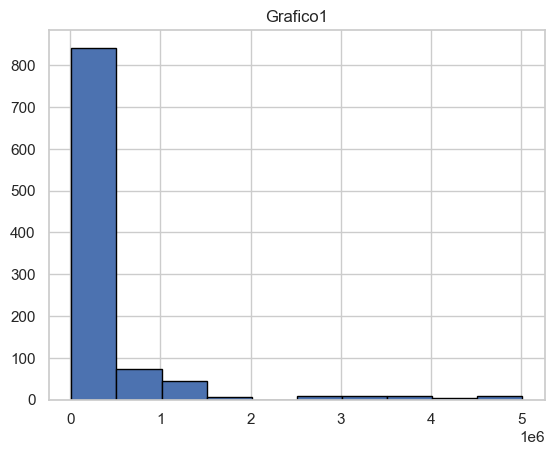

In [233]:
plt.title('Grafico1')
plt.hist(df_int_accptech['Total'], edgecolor='black', linewidth=1)
plt.show()

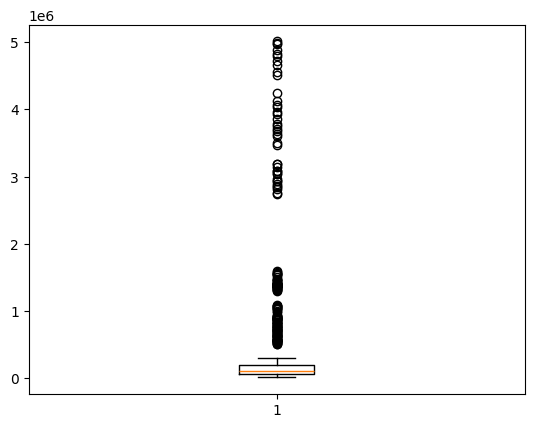

In [ ]:
plt.boxplot(df_int_accptech['Total'])
plt.show()

In [ ]:
high_ = df_int_accptech['Total'].quantile(.75)
low_ = df_int_accptech['Total'].quantile(.25)

In [ ]:
ub_outliers = (df_int_accptech['Total']>high_)

In [ ]:
outliers = df_int_accptech[ub_outliers]
print(outliers)

       Año  Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0     2024          2     Buenos Aires   214055.0   2722466.0     1849476.0   
1     2024          2  Capital Federal    54102.0   1144781.0      230402.0   
5     2024          2          Córdoba    93483.0    443091.0      477504.0   
7     2024          2       Entre Ríos    31335.0    158918.0       68540.0   
12    2024          2          Mendoza    17671.0     66636.0      188815.0   
...    ...        ...              ...        ...         ...           ...   
979   2014          2         Santa Fe   324101.0    178495.0        3085.0   
983   2014          1     Buenos Aires  1567685.0   1000879.0      120960.0   
984   2014          1  Capital Federal   445569.0    820161.0       17767.0   
988   2014          1          Córdoba   336841.0    225769.0         347.0   
1003  2014          1         Santa Fe   322662.0    174296.0        3059.0   

      Wireless    Otros      Total  
0     138638.0

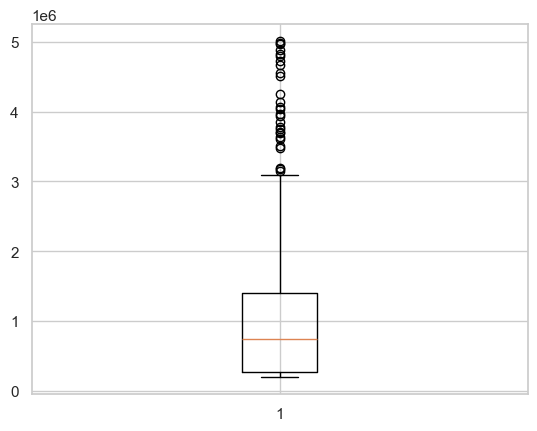

In [ ]:
plt.boxplot(outliers['Total'])
plt.show()

In [253]:
df_int_penpob = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetración-poblacion')
print(f'{df_int_penpob.head(10)}')

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46
5  2024          2          Córdoba                     27.79
6  2024          2       Corrientes                     13.53
7  2024          2       Entre Ríos                     20.52
8  2024          2          Formosa                     10.10
9  2024          2            Jujuy                     14.91


In [245]:
print(f'Dtype & Shape: \n{df_int_penpob.dtypes}{df_int_penpob.shape}\n')

Dtype & Shape: 
Año                           int64
Trimestre                     int64
Provincia                    object
Accesos por cada 100 hab    float64
dtype: object(1000, 4)



In [246]:
print(f'Duplicados:     {df_int_penpob.duplicated().sum()}\nNulos: \n{df_int_penpob.isnull().sum()}\n')

Duplicados:     0
Nulos: 
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64



In [247]:
print(df_int_penpob['Año'].unique())
print(df_int_penpob['Trimestre'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]
[2 1 4 3]


In [248]:
df_int_penpob.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,1000.000000,1000.000000,1000.000000
mean,2018.800000,2.464000,15.727248
std,3.021445,1.114426,9.240063
min,2014.000000,1.000000,2.723000
25%,2016.000000,1.000000,9.018188
50%,2019.000000,2.000000,13.674812
75%,2021.000000,3.000000,20.323973
max,2024.000000,4.000000,52.236739


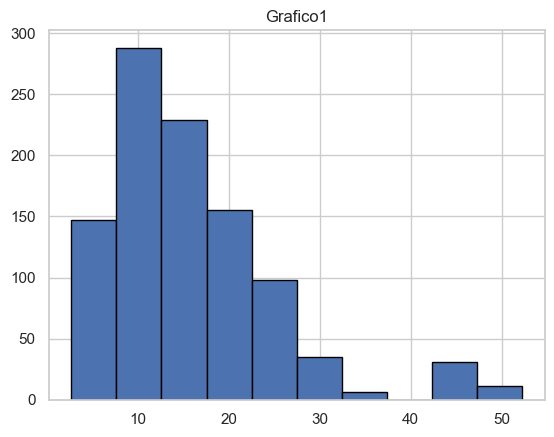

In [250]:
plt.title('Grafico1')
plt.hist(df_int_penpob['Accesos por cada 100 hab'], edgecolor='black', linewidth=1)
plt.show()

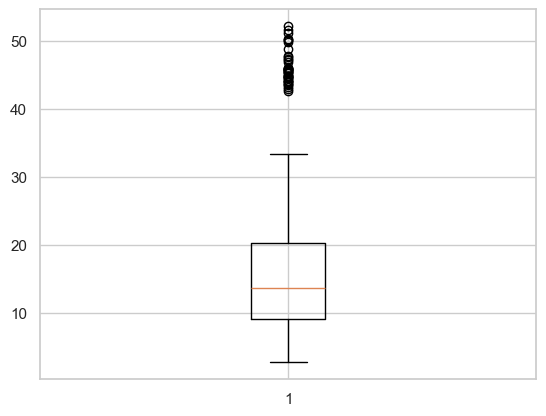

In [251]:
plt.boxplot(df_int_penpob['Accesos por cada 100 hab'])
plt.show()

In [252]:
high_ = df_int_penpob['Accesos por cada 100 hab'].quantile(.75)
ub_outliers = (df_int_penpob['Accesos por cada 100 hab']>high_)
outliers = df_int_penpob[ub_outliers]
print(outliers)

      Año  Trimestre         Provincia  Accesos por cada 100 hab
0    2024          2      Buenos Aires                 27.430000
1    2024          2   Capital Federal                 47.440000
4    2024          2            Chubut                 26.460000
5    2024          2           Córdoba                 27.790000
7    2024          2        Entre Ríos                 20.520000
..    ...        ...               ...                       ...
910  2015          1  Tierra Del Fuego                 22.167155
913  2014          4   Capital Federal                 43.604621
937  2014          3   Capital Federal                 43.206400
961  2014          2   Capital Federal                 42.974777
985  2014          1   Capital Federal                 42.655072

[250 rows x 4 columns]
